# 관련 모듈

In [1]:
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2, torch
import pandas as pd

# 관련 함수

### 예측 이미지 확인

In [2]:
# 박스 위치 확인(이미지 확인)

import cv2
import matplotlib.pyplot as plt

def visualize_yolo(image_path, x, y, w, h):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
    # Draw the bounding box
    xmin = int((x - w / 2) ) 
    ymin = int((y - h / 2) )
    xmax = int((x + w / 2) )
    ymax = int((y + h / 2) )
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    #cv2.putText(img, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### df 생성 함수

In [3]:
# https://stackoverflow.com/questions/75277492/yolov8-get-predicted-class-name

def output_df(model, image):
    result = model.predict(image)
    names_list = model.names

    for each_result in result:
        cls_list = []
    
        # conf_confidence df 추가
        conf_list = each_result.boxes.conf.tolist()
    
        # class df 추가
        for each_class in each_result.boxes.cls:
            #print(length_names[int(c)])
            cls_list.append(names_list[int(each_class)])
        
        # for object_conf in each_result.boxes.conf:
        # print(float(object_conf))   
    
        print(cls_list, conf_list)
   
        # x, y, w, h
        length_xywh_list = result[0].boxes.xywh.tolist()
        xywh_list = []
        for each_xywh in length_xywh_list:
            
            # x,y,w,h df 추가
            each_xywh = [int(i) for i in each_xywh]
            xywh_list.append(each_xywh)
        
            # 시각화
            print(each_xywh)
            xmin, ymin, xmax, ymax = each_xywh
            visualize_yolo(image, xmin, ymin, xmax, ymax)

        
    predicted_data = pd.DataFrame(zip(cls_list, conf_list, xywh_list), columns=['class', 'conf_confidence', 'xywh']).sort_values(by=['conf_confidence'], ascending=False)
    return predicted_data
    

---

### 카테고리 df 생성

In [21]:
def get_category_df(category_model, test_image_list):
    result_df = pd.DataFrame()
    for each_image in test_image_list:
        #print('--------', each_image)
        category_df =  output_df(category_model, each_image)
        for index, row in category_df.iterrows():
            if row['class'] in ['JumpSuit', 'Dress']:
                category_df.loc[index, 'first_class'] = 'Onepiece'
            if row['class'] in ['Blouse', 'Tshirt', 'KnitWear', 'Shirt', 'Cardigan', 'Hoodie']:
                category_df.loc[index, 'first_class'] = 'Top'
            if row['class'] in ['Jeans', 'Pants', 'Skirt', 'JoggerPants']:
                category_df.loc[index, 'first_class'] = 'Bottom'
            if row['class'] in ['Coat', 'Jacket', 'Jumper', 'PaddedJacket', 'Vest']:
                category_df.loc[index, 'first_class'] = 'Outer'
            
        result_df = pd.concat([result_df, category_df], axis=0)
    return result_df
    
# category_df = get_category_df(category_model, test_image_list)
# category_df


NameError: name 'category_model' is not defined

### 소재 df 생성

In [5]:
def get_material_df(material_model, test_image_list):
    result_df = pd.DataFrame()
    for each_image in test_image_list:
        material_df =  output_df(material_model, each_image)
        result_df = pd.concat([result_df, material_df], axis=0)
    return result_df
    
# material_df = get_material_df(material_model, test_image_list)

### 소매기장 df 생성

In [6]:
def get_length_df(length_model, test_image_list):
    result_df = pd.DataFrame()
    for each_image in test_image_list:
        length_df =  output_df(length_model, each_image)
        result_df = pd.concat([result_df, length_df], axis=0)
    return result_df
    
#length_df = get_length_df(length_model, test_image_list)
#length_df

### 모델별 결과 매칭 함수


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Tshirt, 2 Pantss, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


['Tshirt', 'Pants', 'Pants'] [0.8276590704917908, 0.5317766070365906, 0.5035106539726257]
[164, 169, 262, 339]


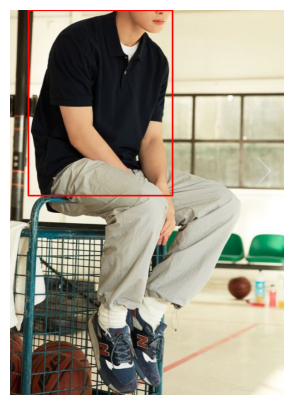

[183, 425, 234, 338]


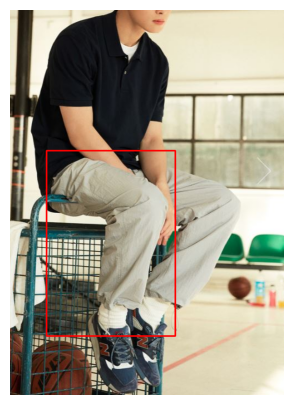

[235, 425, 344, 340]


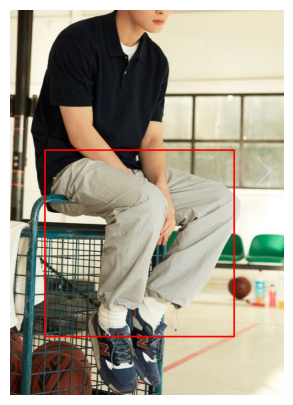


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 416x320 1 jersey, 1 linen, 1 woven, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


['linen', 'woven', 'jersey'] [0.6887678503990173, 0.6744109392166138, 0.48725730180740356]
[246, 426, 355, 334]


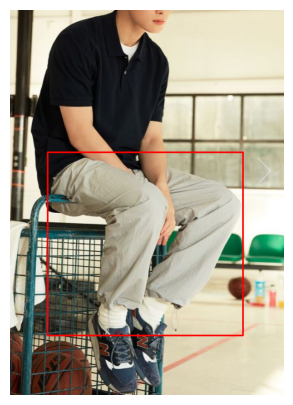

[163, 173, 261, 346]


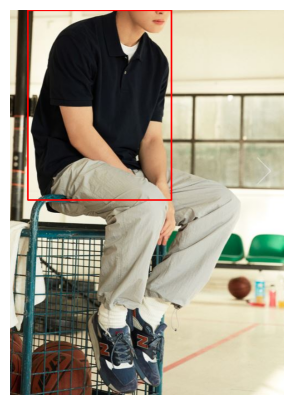

[164, 172, 260, 344]


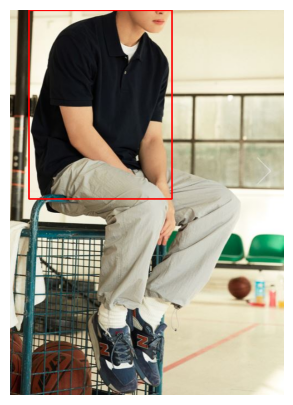


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Short sleeve, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


['Short sleeve'] [0.9005503058433533]
[166, 169, 258, 338]


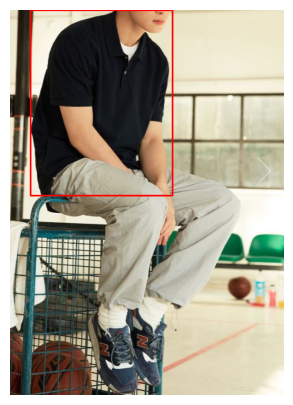

c_class  c_conf_confidence                c_xywh c_first_class m_class  \
0  Tshirt           0.827659  [164, 169, 262, 339]           Top  jersey   
1   Pants           0.531777  [183, 425, 234, 338]        Bottom     NaN   
2   Pants           0.503511  [235, 425, 344, 340]        Bottom   linen   

   m_conf_confidence                m_xywh       l_class  l_conf_confidence  \
0           0.487257  [164, 172, 260, 344]  Short sleeve            0.90055   
1                NaN                   NaN           NaN                NaN   
2           0.688768  [246, 426, 355, 334]           NaN                NaN   

                 l_xywh  
0  [166, 169, 258, 338]  
1                   NaN  
2                   NaN

In [19]:
# 모델별 결과에서 가까운 좌표끼리 매칭 

def get_match_df(image_list):
    
    # 모델 불러오기
    category_model = YOLO('../best_pt/category_best.pt')
    length_model = YOLO('../best_pt/length_best.pt')
    material_model = YOLO('../best_pt/material_best.pt')
    
    # 카테고리별 df 
    category_df = get_category_df(category_model, image_list)
    material_df = get_material_df(material_model, image_list)
    length_df = get_length_df(length_model, image_list)
  
    # 결과 df
    result_df = category_df.copy()
    result_df.rename(columns={'class' : 'c_class', 'conf_confidence':'c_conf_confidence',
                            'xywh' : 'c_xywh', 'first_class':'c_first_class'}, inplace=True)
    result_df.reset_index(drop=True, inplace=True)
    
    #print(result_df)
    #print(length_df)
    

    for re_index, result_row in result_df.iterrows():
        #print(re_index)
        #print(result_df.loc[re_index])
        category_temp = result_row['c_xywh']

        c_x_center = category_temp[0] + category_temp[2] /2
        c_y_center = category_temp[1] + category_temp[3] /2
        #print(c_x_center, c_y_center)
        
        
        # 카테고리와 소재 매칭
        temp_x_center1 = 0
        temp_y_center1 = 0
        if len(material_df) > 1:
            for idx, m_row in material_df.iterrows():
                material_temp = m_row['xywh']
                m_x_center = material_temp[0] + material_temp[2] /2
                m_y_center = material_temp[1] + material_temp[3] /2
                #print(m_x_center, m_y_center)
                
                diff_x_center = abs(c_x_center - m_x_center)
                diff_y_center = abs(c_y_center - m_y_center)
                
                #print(m_row)
                #print(diff_x_center, diff_y_center)
                #print('+++')
                    
                if temp_x_center1 == 0 and temp_y_center1 == 0:
                    temp1 = m_row
                    temp_x_center1 = diff_x_center
                    temp_y_center1 = diff_y_center
                    #print(temp, temp_x_center, temp_y_center)
                
                
                elif temp_x_center1 >= diff_x_center:
                    if temp_y_center1 >= diff_y_center:
                        result_df.loc[re_index, 'm_class'] = m_row['class']
                        result_df.loc[re_index, 'm_conf_confidence'] = m_row['conf_confidence']
                        result_df.loc[re_index, 'm_xywh'] = str(m_row['xywh'])
                        
                else:
                    result_df.loc[re_index, 'm_class'] = temp1['class']
                    result_df.loc[re_index, 'm_conf_confidence'] = temp1['conf_confidence']
                    result_df.loc[re_index, 'm_xywh'] = str(temp1['xywh'])
                    #print(t_df)
    
        else:
            for idx, m_row in material_df.iterrows():
                result_df.loc[re_index, 'm_class'] = m_row['class']
                result_df.loc[re_index, 'm_conf_confidence'] = m_row['conf_confidence']
                result_df.loc[re_index, 'm_xywh'] = str(m_row['xywh'])
                
               
        # 소매기장 매칭
        if result_row['c_first_class'] in ['Onepiece', 'Top', 'Outer']:
            temp_x_center2 = 0
            temp_y_center2 = 0
            if len(result_df[result_df['c_first_class'].isin(['Onepiece', 'Top', 'Outer'])]) > 1: # 소매기장 df row가 두개 이상일 경우
                    
                for idx, l_row in length_df.iterrows():
                    length_temp2 = l_row['xywh']
                    l_x_center = length_temp2[0] + length_temp2[2] /2
                    l_y_center = length_temp2[1] + length_temp2[3] /2
                
                    diff_x_center = abs(c_x_center - l_x_center)
                    diff_y_center = abs(c_y_center - l_y_center)
                
                    #print(l_row)
                    #print(diff_x_center, diff_y_center)
                    #print('+++')
                    
                    if temp_x_center2 == 0 and temp_y_center2 == 0:
                        temp2 = l_row
                        temp_x_center2 = diff_x_center
                        temp_y_center2 = diff_y_center
                        #print(temp, temp_x_center, temp_y_center)
                
                    
                    elif temp_x_center2 >= diff_x_center:
                        if temp_y_center2 >= diff_y_center:
                            result_df.loc[re_index, 'l_class'] = l_row['class']
                            result_df.loc[re_index, 'l_conf_confidence'] = l_row['conf_confidence']
                            result_df.loc[re_index, 'l_xywh'] = str(l_row['xywh'])
                        
                    else:
                        result_df.loc[re_index, 'l_class'] = temp2['class']
                        result_df.loc[re_index, 'l_conf_confidence'] = temp2['conf_confidence']
                        result_df.loc[re_index, 'l_xywh'] = str(temp2['xywh'])
            else:  # 소매기장 df row가 하나일 경우
                for idx, l_row in length_df.iterrows():
                    #print(l_row)
                    result_df.loc[re_index, 'l_class'] = l_row['class']
                    result_df.loc[re_index, 'l_conf_confidence'] = l_row['conf_confidence']
                    result_df.loc[re_index, 'l_xywh'] = str(l_row['xywh'])
                    
    return result_df
                        
get_match_df(test_image_list)

### 클래스 한글화 함수

In [8]:
def get_korean_class(first_category, second_category, material, length=None):
    
    # 첫번째 카테고리
    korean_first_category_dict = {'Onepiece' : '원피스', 'Top' : '상의', 'Outer' : '아우터', 'Bottom':'하의'}
    for key, value in korean_first_category_dict.items():
        if first_category == key:
            k_first_category = value
            
    # 두번째 카테고리
    korean_second_category_dict = {'JumpSuit' : '점프수트', 'Blouse' : '블라우스', 'KnitWear':'니트웨어', 
                                   'Shirt':'셔츠', 'Cardigan':'가디건', 'Hoodie':'후드티', 'Jeans':'청바지',
                                  'Pants':'팬츠', 'Skirt':'스커트', 'Dress':'드레스', 'JoggerPants':'조거팬츠',
                                  'Coat':'코트','Jacket':'재킷', 'Jumper':'점퍼', 'PaddedJacket':'패딩', 'Vest':'베스트'}
    for key, value in korean_second_category_dict.items():
        if second_category == key:
            k_second_category = value
    
    # 소재
    korean_material_dict = {'padding' : '패딩', 'Mustang' : '무스탕', 'suede':'스웨이드', 'corduroy':'코듀로이', 'Sequin/Glitter' : '스팽글/글리터',
                           'Denim' : '데님', 'jersey' : '저지', 'tweed' : '트위드', 'velvet' : '벨벳', 'vinyl/PVC' : '비닐/PVC',
                           'wool/cashmere' : '울/캐시미어', 'hair knit' : '헤어니트', 'knit' : '니트', 'lace' : '레이스',
                           'linen' : '린넨', 'messi' : '메시', 'fleece' : '플리스', 'neoprene' : '네오프렌', 'silk' : '실크',
                            'spandex' : '스판덱스', 'jacquard' : '자카드', 'leather' : '가죽', 'chiffon' : '시폰', 'woven' : '우븐'}
    for key, value in korean_material_dict.items():
        if material == key:
            k_material = value
    
    # 소매기장
    korean_length_dict = {'Sleeveless shirt' : '민소매', 'Short sleeve' : '반팔', 'Cap':'캡', 'Three-quarter sleeve' : '7부소매', 'Long sleeve' : '긴팔'}
    for key, value in korean_length_dict.items():
        if length == key:
            k_length = value
    
    if length is None:
        return k_first_category, k_second_category, k_material
    else:
        return k_first_category, k_second_category, k_material, k_length
        
#get_korean_class('Onepiece', 'Dress', 'velvet')
#get_korean_class('Onepiece', 'Dress', 'velvet', 'Sleeveless shirt')

### 분류 결과값 출력 함수

In [9]:
def get_output_class(category_first_class, category_second_class, material_class, length_class=None):
    if length_class is None:
        print('===========================================================================================================')
        print(f'카테고리 : {category_first_class} > {category_second_class} > {material_class}')
        print('===========================================================================================================')
        print(f'1차 카테고리 : {category_first_class} | 2차 카테고리 : {category_second_class} | 소재 : {material_class}')
    else:
        print('===========================================================================================================')
        print(f'카테고리 : {category_first_class} > {length_class} {category_second_class} > {material_class}')
        print('===========================================================================================================')
        print (f'1차 카테고리 : {category_first_class} | 2차 카테고리 : {category_second_class} | 소재 : {material_class} | 소매 기장 : {length_class}')

### 점수 높은 class 구하는 함수


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Tshirt, 2 Pantss, 3.0ms
Speed: 2.0ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


['Tshirt', 'Pants', 'Pants'] [0.8276590704917908, 0.5317766070365906, 0.5035106539726257]
[164, 169, 262, 339]


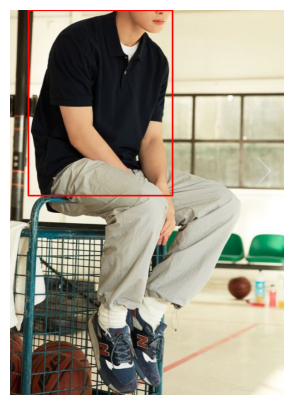

[183, 425, 234, 338]


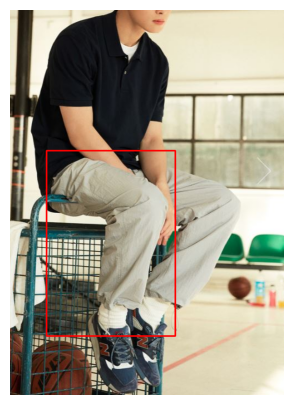

[235, 425, 344, 340]


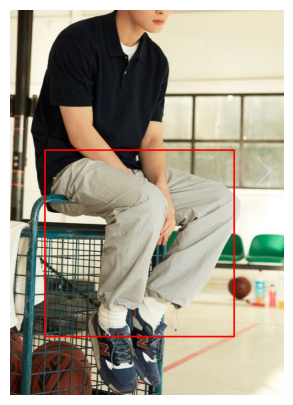


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 416x320 1 jersey, 1 linen, 1 woven, 4.3ms
Speed: 1.0ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 320)


['linen', 'woven', 'jersey'] [0.6887678503990173, 0.6744109392166138, 0.48725730180740356]
[246, 426, 355, 334]


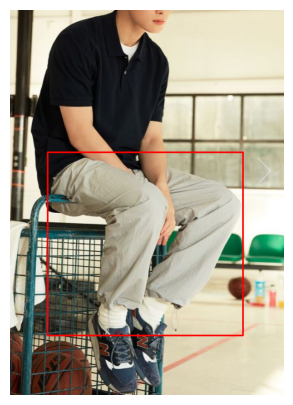

[163, 173, 261, 346]


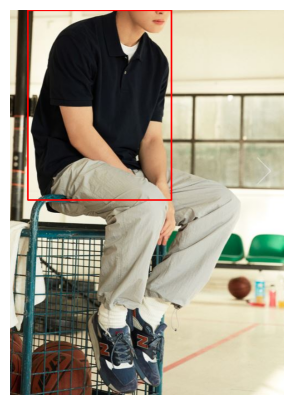

[164, 172, 260, 344]


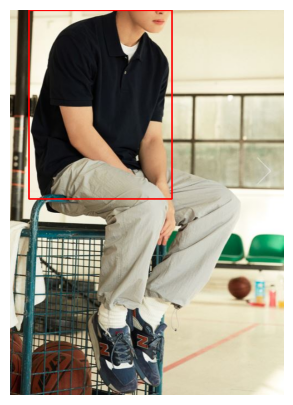


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Short sleeve, 1.0ms
Speed: 2.0ms preprocess, 1.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


['Short sleeve'] [0.9005503058433533]
[166, 169, 258, 338]


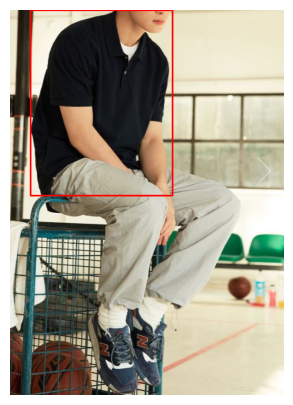

카테고리 : 하의 > 팬츠 > 린넨
1차 카테고리 : 하의 | 2차 카테고리 : 팬츠 | 소재 : 린넨


In [22]:
# 점수가 높은 class 구하기

def get_best_class(test_image_list):
    
    r_df = get_match_df(test_image_list)
    
    # 카테고리 class 구하기
    c_groupby_df = r_df.groupby(['c_class', 'c_first_class'])['c_conf_confidence'].agg('sum')
    category_second_class = c_groupby_df.idxmax()[0]
    category_first_class = c_groupby_df.idxmax()[1]
    
    # 소재 class 구하기
    m_df = r_df[(r_df['c_class'] == category_second_class) & (r_df['c_first_class'] == category_first_class)]
    m_groupby_df = m_df.groupby(['m_class'])['m_conf_confidence'].agg('sum')
    material_class =  m_groupby_df.idxmax()
    
    # 소매기장 class 구하기
    # 소매기장 컬럼 존재할 경우
    if 'l_class' in r_df.columns:
        l_df = r_df[(r_df['c_class'] == category_second_class) & (r_df['c_first_class'] == category_first_class) & (r_df['m_class'] == material_class)]
        l_groupby_df = l_df.groupby(['l_class'])['l_conf_confidence'].agg('sum')
        #print(l_groupby_df)
        
        # 소매기장 값이 없을 경우
        if len(l_groupby_df) == 0:
            category_first_class, category_second_class, material_class = get_korean_class(category_first_class, category_second_class, material_class)
            #print(category_second_class, category_first_class, material_class)
            get_output_class(category_first_class, category_second_class, material_class)
            
        # 소매기장 값이 있을 경우
        else : 
            length_class =  l_groupby_df.idxmax()
            category_first_class, category_second_class, material_class, length_class = get_korean_class(category_first_class, category_second_class, material_class, length_class)
            #print(category_second_class, category_first_class, material_class, length_class)
            get_output_class(category_first_class, category_second_class, material_class, length_class)
    # 소매기장 컬럼이 존재하지 않을 경우
    else:
        category_first_class, category_second_class, material_class = get_korean_class(category_first_class, category_second_class, material_class)
        #print(category_second_class, category_first_class, material_class)
        get_output_class(category_first_class, category_second_class, material_class)
    

get_best_class(test_image_list)

---

In [17]:
# 테스트 이미지

# valid 이미지 # 상하의 이미지
#test_image = '../data/temp_datasets/length/valid/images/1101776.jpg'
#test_image_list = [test_image]

# valid 이미지 # 원피스 이미지
#test_image = '../data/temp_datasets/length/valid/images/510.jpg'
#test_image_list = [test_image]


# musinsa 이미지
#test_image1 = '../test image/musinsa sample (1).JPG'
#test_image2 = '../test image/musinsa sample (2).JPG'
#test_image_list = [test_image1, test_image2]

# giordano
g_test = '../test image/giordano_test.jpg'
test_image_list = [g_test]


# spao 이미지
#test_image1 = '../test image/spao_test1.JPG'
#test_image2 = '../test image/spao_test2.JPG'
#test_image3 = '../test image/spao_test3.JPG'
#test_image_list = [test_image1, test_image2, test_image3]

test_image_list


['../test image/giordano_test.jpg']


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Tshirt, 2 Pantss, 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


['Tshirt', 'Pants', 'Pants'] [0.8276590704917908, 0.5317766070365906, 0.5035106539726257]
[164, 169, 262, 339]


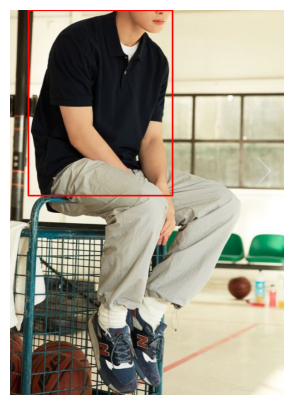

[183, 425, 234, 338]


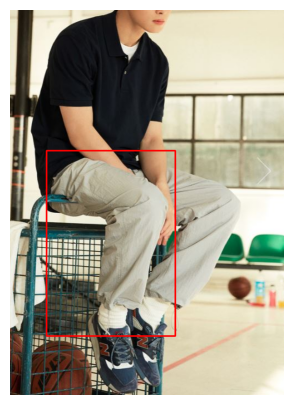

[235, 425, 344, 340]


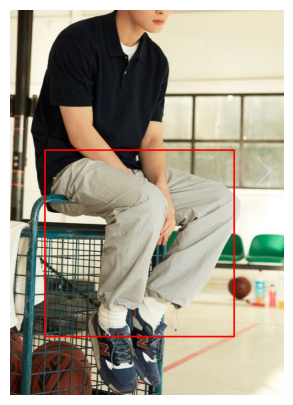


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 416x320 1 jersey, 1 linen, 1 woven, 39.9ms
Speed: 1.0ms preprocess, 39.9ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


['linen', 'woven', 'jersey'] [0.6887678503990173, 0.6744109392166138, 0.48725730180740356]
[246, 426, 355, 334]


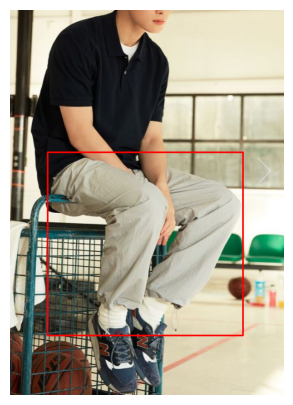

[163, 173, 261, 346]


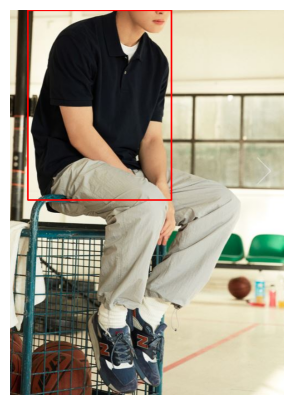

[164, 172, 260, 344]


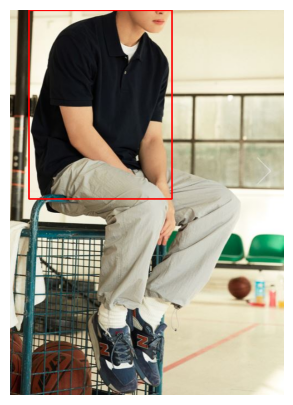


image 1/1 C:\Users\user1\Documents\deeplearning\teamstudy\code\..\test image\giordano_test.jpg: 640x480 1 Short sleeve, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


['Short sleeve'] [0.9005503058433533]
[166, 169, 258, 338]


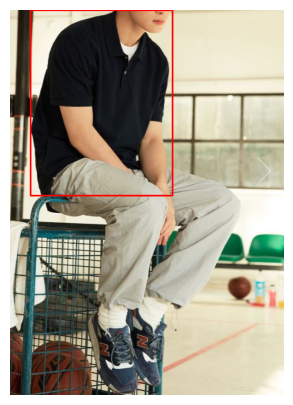

카테고리 : 하의 > 팬츠 > 린넨
1차 카테고리 : 하의 | 2차 카테고리 : 팬츠 | 소재 : 린넨


In [18]:
#get_match_df(test_image_list)
get_best_class(test_image_list)

In [32]:
# 지오다노 이미지 : 상의 상품 이미지였는데 하나만 입력할 경우, pant로 잘못 분류됨 ㅠㅠ
# 무신사 이미지 : 두 개를 입력할 경우 괜찮게 분류
# 스파오 이미지 : 바지일 경우, 소매기장은 데이터 안나오게끔 설정 


# 한글로 바꾸기 필요 ★★★